In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\shari\Desktop\My projects\Machine learning projects\archive\vehicle\bus.jpg
C:\Users\shari\Desktop\My projects\Machine learning projects\archive\vehicle\Bus_front.xml
C:\Users\shari\Desktop\My projects\Machine learning projects\archive\vehicle\Cars.mp4
C:\Users\shari\Desktop\My projects\Machine learning projects\archive\vehicle\cars.png
C:\Users\shari\Desktop\My projects\Machine learning projects\archive\vehicle\cars.xml


In [3]:
from PIL import Image
import cv2
import sys
import numpy as np
import requests

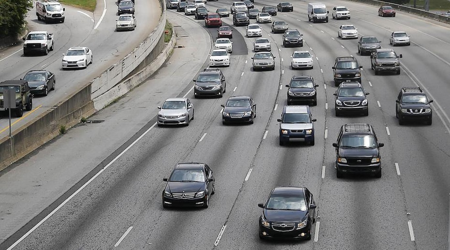

In [4]:
# Reading image from url
image = Image.open('C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle\\cars.png')
image = image.resize((450, 250))
image_arr = np.array(image)
image

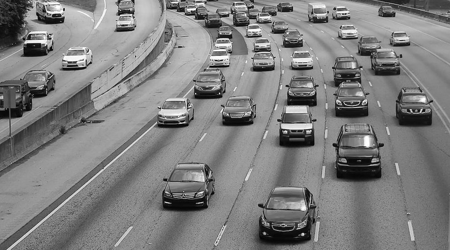

In [5]:
grey = cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
Image.fromarray(grey)


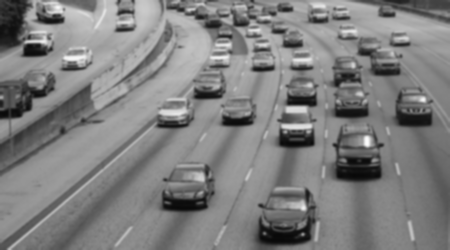

In [6]:
blur = cv2.GaussianBlur(grey,(5,5),0)
Image.fromarray(blur)

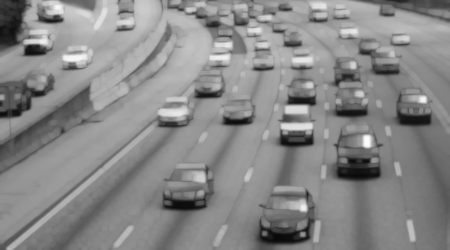

In [7]:
dilated = cv2.dilate(blur, np.ones((3,3)))
Image.fromarray(dilated)

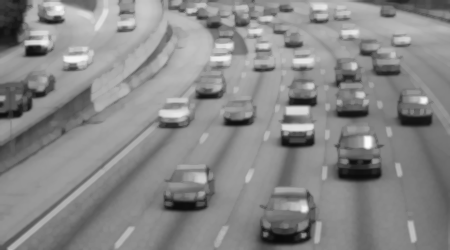

In [8]:
kernle = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
closing = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernle)
Image.fromarray(closing)

In [11]:
car_cascade_src = 'C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle\\cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing, 1.1, 1)

22  cars found 


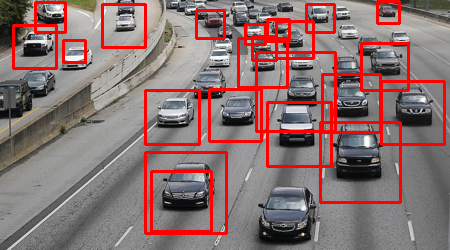

In [12]:
cnt = 0
for (x,y,w,h) in cars:
    cv2.rectangle(image_arr, (x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, " cars found ")
Image.fromarray(image_arr)

In [14]:
image2 = Image.open('C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle\\bus.jpg')
image2 = image2.resize((450,250))
image_arr2 = np.array(image2)
grey2 = cv2.cvtColor(image_arr2, cv2.COLOR_BGR2GRAY)

In [15]:
bus_cascade_src = 'C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle\\Bus_front.xml'
bus_cascade = cv2.CascadeClassifier(bus_cascade_src)
bus = bus_cascade.detectMultiScale(grey2, 1.1, 1)

1 bus's found


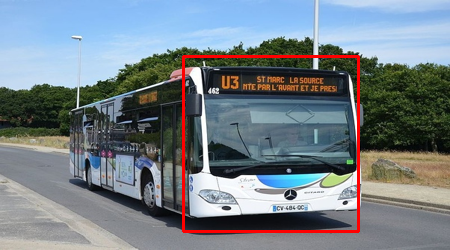

In [16]:
cnt = 0
for (x,y,w,h) in bus:
    cv2.rectangle(image_arr2,(x,y),(x+w,y+h),(255,0,0),2)
    cnt += 1
print(cnt, "bus's found")
Image.fromarray(image_arr2)

In [23]:
cascade_src = 'C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle\\cars.xml'
video_src = 'C:\\Users\\shari\\Desktop\\My projects\\Machine learning projects\\archive\\vehicle\\Cars.mp4'

cap = cv2.VideoCapture(video_src)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi', cv2.VideoWriter_fourcc(*'DIVX'), 15, (450,250))

In [19]:
while True:
    ret, img = cap.read()
    
    if (type(img) == type(None)):
        break
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cars = car_cascade.detectMultiScale(gray, 1.1, 2)
    
    for (x,y,w,h) in cars:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
        
    video.write(img)
video.release()